 Author: Jenea Spinks

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Chocolate Bar rating dataset

We used a publicly available dataset: http://flavorsofcacao.com/chocolate_database.html

In [2]:
chocolate = pd.read_csv('data/chocolate.csv')
chocolate.head(5)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,1205,Habitual,Canada,2014,Blend,one hundred,100%,NaN,"unrefined, bitter, earthy",2.00
1,701,Haigh,Australia,2011,Blend,South America and Africa,70%,NaN,"vanilla, chocolate milk",3.00
2,1113,Hotel Chocolat,U.K.,2013,St. Lucia,"Island Growers, 2012, 120hr c., batch 13080",100%,NaN,"pastey, bitter, unfixable",1.75
3,296,Hotel Chocolat (Coppeneur),U.K.,2008,Uganda,Uganda,80%,NaN,"charred, espresso",2.50
4,552,Hotel Chocolat (Coppeneur),U.K.,2010,Ecuador,Ecuador,70%,NaN,"spicy, sour, burning",2.75


## Company Location with the highest average rating

In this section, we will analyze the company location with the highest average rating. By finding this company location, we can slice into the entire chocolate bar dataset to see if there are any characterics/features that cause this highest average rating. 

After finding the company location with the highest average rating, we will look at the ingredients of companies in this location to identify any key ingredients that may have impacted the high ratings of the chocolates

First, we will obtain the columns of Company Locaton and Rating to form a new dataset for our analysis and use this dataset to group by the Company location using the mean of all ratings for the location

In [3]:
company_rating = chocolate[['Company Location','Rating']]
company_rating.head(5)

,Company Location,Rating
0,Canada,2.00
1,Australia,3.00
2,U.K.,1.75
3,U.K.,2.50
4,U.K.,2.75


In [4]:
rating_grouped = company_rating.groupby('Company Location').mean().reset_index()
rating_grouped.head(5)

,Company Location,Rating
0,Amsterdam,3.218750
1,Argentina,3.150000
2,Australia,3.433824
3,Austria,3.192308
4,Belgium,3.086538


In [14]:
rating_grouped.to_csv('Tables/Company_Location_Average_Rating.csv')

Then, we will create a scatter plot for the mean ratings of each company locations to visualize any outliers rating that can be further analyzed

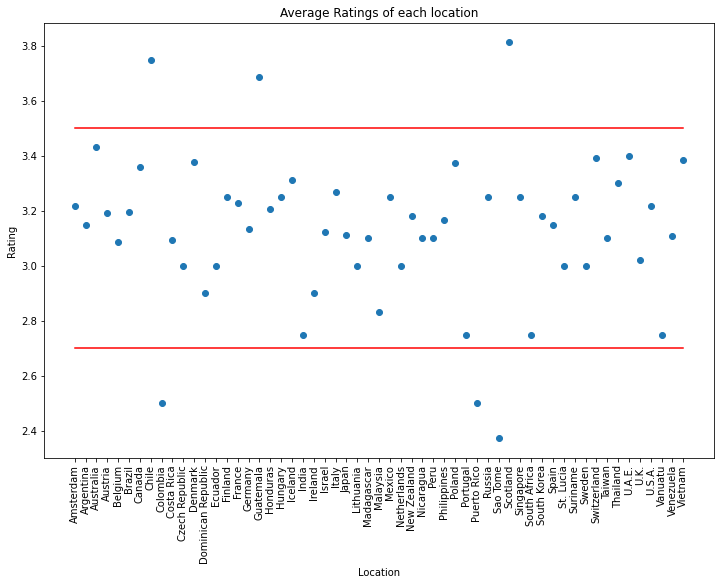

In [10]:
rating = rating_grouped['Rating']
company_location = rating_grouped['Company Location']
plt.figure(figsize = (12,8))
plt.scatter(company_location,rating)
plt.plot(company_location, np.ones(len(rating))*2.7, color = 'r')
plt.plot(company_location, np.ones(len(rating))*3.5, color = 'r')
plt.xticks(rotation= 90 )
plt.title('Average Ratings of each location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.savefig('Figures/CompanyLocation_MeanRating')

In [35]:
min_locations = rating_grouped.sort_values('Rating', ascending = True)['Company Location'].values[0:3]
max_locations = rating_grouped.sort_values('Rating', ascending = False)['Company Location'].values[0:3]

In [38]:
print('The locations with the lowest average ratings are',min_locations)
print('The locations with the highest average ratings are',max_locations)

The locations with the lowest average ratings are ['Sao Tome' 'Puerto Rico' 'Colombia']
The locations with the highest average ratings are ['Scotland' 'Chile' 'Guatemala']


From this plot, we can see that most of the countries' rating were between the range of 2.8 and 3.4 except for six locations; three above a rating of  3.5  and three below 2.7. The three company locations with the high ratings are Scotland, Chile and Guatemala and the three lowest are SaoTome, Puerto Rico and Colombia

## Company Locations with highest Overall Rating and lowest overall rating

In [12]:
max_rating = max(rating_grouped['Rating'])
max_company = rating_grouped[rating_grouped['Rating'] == max_rating]
max_company

,Company Location,Rating
40,Scotland,3.8125


In [16]:
min_rating = min(rating_grouped['Rating'])
min_company = rating_grouped[rating_grouped['Rating'] == min_rating]
min_company

,Company Location,Rating
39,Sao Tome,2.375


Based on the tables above, the company location with the lowest average rating was Sao Tome with an average rating of 2.375 and the company location with the highest average rating amongst the three was Scotland with an average rating of 3.8. 

Next, we will slice into the chocolate data to only have the three maximum rating locations and the three minimum rating locations to observe any key ingredients that caused these six company locations to have the highest and lowest average ratings.

In [43]:
bools_min = [chocolate['Company Location'][i] in min_locations for i in np.arange(len(chocolate))]
min_companies = chocolate[bools_min]
min_companies

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
26,955,Mita,Colombia,2012,Colombia,Tumaco,65%,NaN,"vanilla, artificial, sweet",2.50
73,252,Claudio Corallo,Sao Tome,2008,Blend,"Principe, Sao Tome & Principe",100%,NaN,"chalky, musty, very bitter",1.00
560,1606,Cacao Arabuco,Puerto Rico,2015,Puerto Rico,Puerto Rico,70%,"2- B,S","dirt, floral, sweet",2.50
643,470,Claudio Corallo,Sao Tome,2010,Blend,"Terreiro Velho P., Sao Tome & Principe",73.50%,"2- B,S","short,mild cocoa, mild fruit",3.75


In [42]:
bools_max = [chocolate['Company Location'][i] in max_locations for i in np.arange(len(chocolate))]
max_companies = chocolate[bools_max]
max_companies

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
290,1638,Obolo,Chile,2015,Peru,"Pangoa, w/ nibs",70%,"2- B,S","creamy, roasty, mild grape",3.75
291,2386,Obolo,Chile,2019,Peru,"Pangoa, 2018, batch 1584 - E",70%,"2- B,S","intense grapes, sweet cocoa",3.75
627,1121,Chocolate Tree,Scotland,2013,Peru,Peru,70%,"2- B,S","intense orange, floral notes",3.75
628,1582,Chocolate Tree,Scotland,2015,Venezuela,Carenero Superior,80%,"2- B,S","mild bitter, fruit, spice",3.75
684,991,Danta,Guatemala,2012,Guatemala,"Oscuro, Finca Chimelb",70%,"2- B,S","nutty, ashey, spicy pepper",3.25
685,987,Danta,Guatemala,2012,Guatemala,Los Ujuxtes,70%,"2- B,S",spicy,3.75
686,987,Danta,Guatemala,2012,Madagascar,Sambirano,70%,"2- B,S","oily, toffee, hints of fruit",3.75
687,987,Danta,Guatemala,2012,Guatemala,Las Acacias E.,70%,"2- B,S","sweet spice, floral",4.00
1164,1558,Ocelot,Scotland,2015,Congo,Virunga,70%,"3- B,S,C","melon, earthy, tobacco",3.75
1165,1558,Ocelot,Scotland,2015,Peru,Piura,75%,"3- B,S,C","peanut butter, raspberry",4.00


## Ingredients with best average rating

Using these two datasets containing the six countries, we will analyze how ingredients affects these ratings of chocolates and how this relationship links to the top three and bottom three rated locations.

First we will drop the rows with missing values as this could affest our analysis. Then we will group by each ingredients using the mean rating for each.

In [11]:
ingredients = chocolate.dropna(subset = ['Ingredients'])[['Ingredients','Rating']]
ingredients_grouped = ingredients.groupby('Ingredients').mean().reset_index()
ingredients_grouped

,Ingredients,Rating
0,1- B,2.958333
1,"2- B,C",3.000000
2,"2- B,S",3.229457
3,"2- B,S*",2.959677
4,"3- B,S*,C",2.937500
5,"3- B,S*,Sa",2.500000
6,"3- B,S,C",3.280540


In [13]:
ingredients_grouped.to_csv('Tables/Ingredients_Average_Rating.csv')

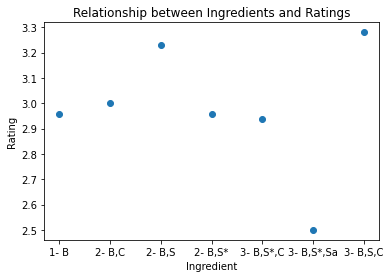

In [12]:
x = ingredients_grouped['Ingredients']
y = ingredients_grouped['Rating']
plt.scatter(x,y)
plt.title('Relationship between Ingredients and Ratings')
plt.ylabel('Rating')
plt.xlabel('Ingredient')
plt.savefig('Figures/Ingredients_MeanRatings')

From this plot, the ingredient 3- B,S*,Sa has the lowest overall mean rating and the ingredients 3- B,S,C and 2-B,S have the highest ratings within the dataset.

From the above analysis of both the company locations and ingredients, the top three rated company locations have the highest overall rated ingredients  which is 2-B,S and 3-B,S,C however, the lowest rated companies does not contain the lowest rate ingredient so the low ratings may be due to another feature in the dataset as the ingredients contain Nan values and 2-B,C ingredients.